In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [34]:
plt.rcParams.update({'font.size': 15})

<IPython.core.display.Javascript object>

In [29]:
data = pd.read_csv('data/processed_data.csv')
data.head()

<IPython.core.display.Javascript object>

,tweet_id,tweet,sentiment
0,1701,sxswnui sxsw apple defining language touch dif...,1
1,1851,learning google doodles doodles light funny in...,1
2,2689,one -your-face stealing show years sxsw apple ...,2
3,4525,iphone sxsw app would pretty awesome crash eve...,0
4,3604,line outside apple store austin waiting new ip...,1


In [30]:
data.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [31]:
data.dropna(inplace=True)

In [32]:
data['sentiment'].value_counts()

1    4309
2    2382
0     456
3     125
Name: sentiment, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

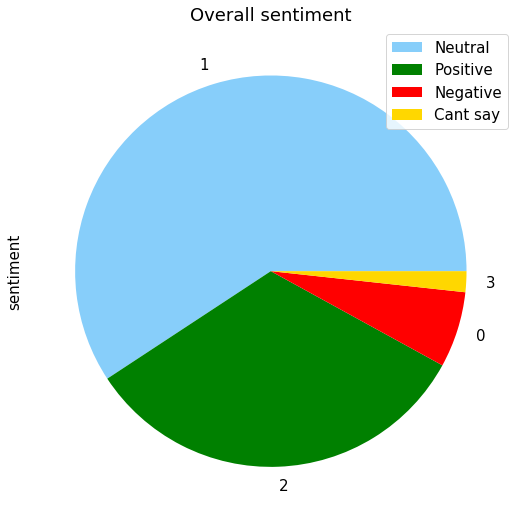

In [35]:
plt.figure(figsize=(15, 9))
labels = ['Neutral', 'Positive', 'Negative', 'Cant say']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.title('Overall sentiment')
no_of_tweets=data['sentiment'].value_counts()
no_of_tweets.plot(kind='pie',colors = ['lightskyblue', 'green', 'red', 'gold'])
plt.legend(labels, loc="best")

In [36]:
raw_data = pd.read_csv('data/train.csv')
raw_data.dropna(inplace=True)
raw_data['tweet_len_noisy'] = [len(t) for t in raw_data.tweet]
raw_data.head()

<IPython.core.display.Javascript object>

,tweet_id,tweet,sentiment,tweet_len_noisy
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89
1,1851,Learning ab Google doodles! All doodles should...,1,143
2,2689,one of the most in-your-face ex. of stealing t...,2,132
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125
4,3604,Line outside the Apple store in Austin waiting...,1,77


In [37]:
negative_tweets = raw_data[raw_data['sentiment'] == 0]
neutral_tweets = raw_data[raw_data['sentiment'] == 1]
positive_tweets = raw_data[raw_data['sentiment'] == 2]
unknown_sent = raw_data[raw_data['sentiment'] == 3]

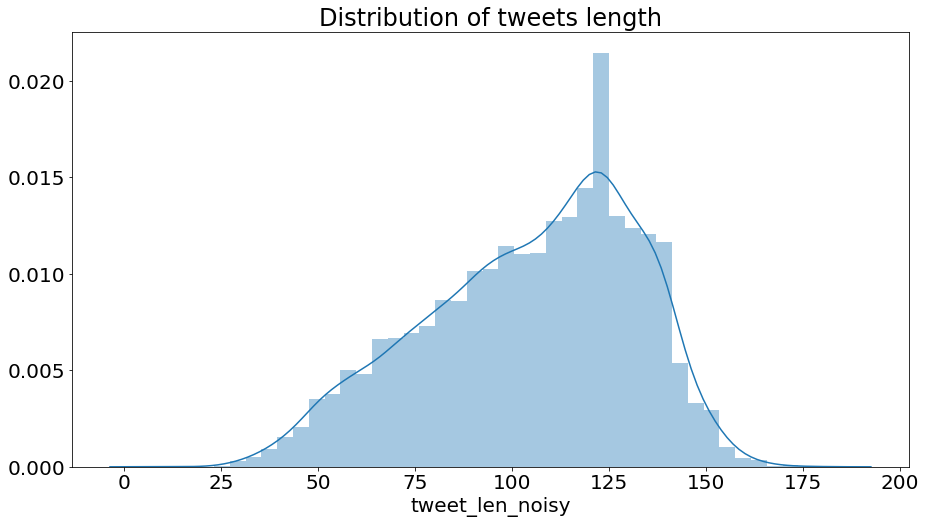

In [46]:
plt.figure(figsize=(15,8))
plt.title('Distribution of tweets length')
sns.distplot(raw_data['tweet_len_noisy'])

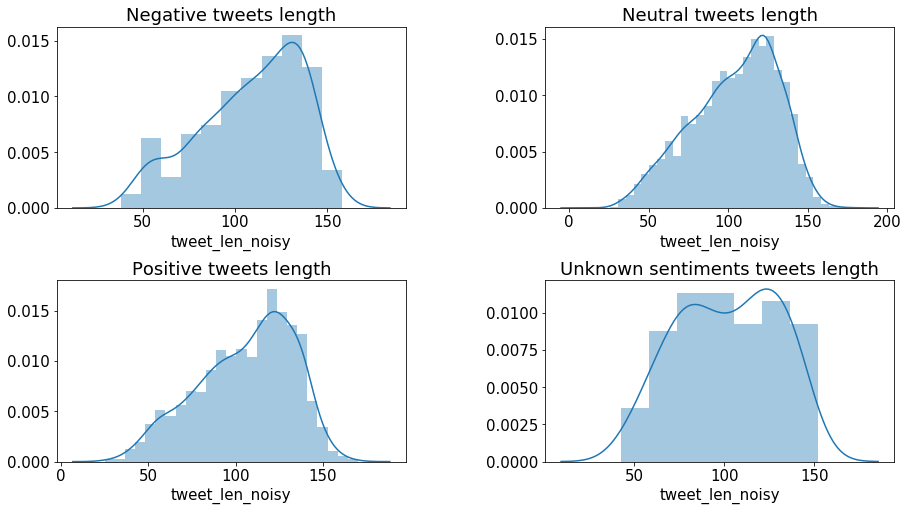

In [62]:
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
ax.title.set_text('Negative tweets length')
sns.distplot(negative_tweets['tweet_len_noisy'],ax=ax)
ax = fig.add_subplot(2, 2, 2)
ax.title.set_text('Neutral tweets length')
sns.distplot(neutral_tweets['tweet_len_noisy'],ax=ax)
ax = fig.add_subplot(2, 2, 3)
ax.title.set_text('Positive tweets length')
sns.distplot(positive_tweets['tweet_len_noisy'],ax=ax)
ax = fig.add_subplot(2, 2, 4)
ax.title.set_text('Unknown sentiments tweets length')
sns.distplot(unknown_sent['tweet_len_noisy'],ax=ax)
plt.show()

In [23]:
def most_frequent_words(data, col_name, title):
    # most common words in twitter dataset
    all_words = []
    for line in list(data[col_name]):
        words = line.split()
        for word in words:
            all_words.append(word.lower())# plot word frequency distribution of first few words
    plt.figure(figsize=(15,8))
    plt.title(title)
    plt.xticks(fontsize=13, rotation=90)
    fd = nltk.FreqDist(all_words)
    fd.plot(25,cumulative=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

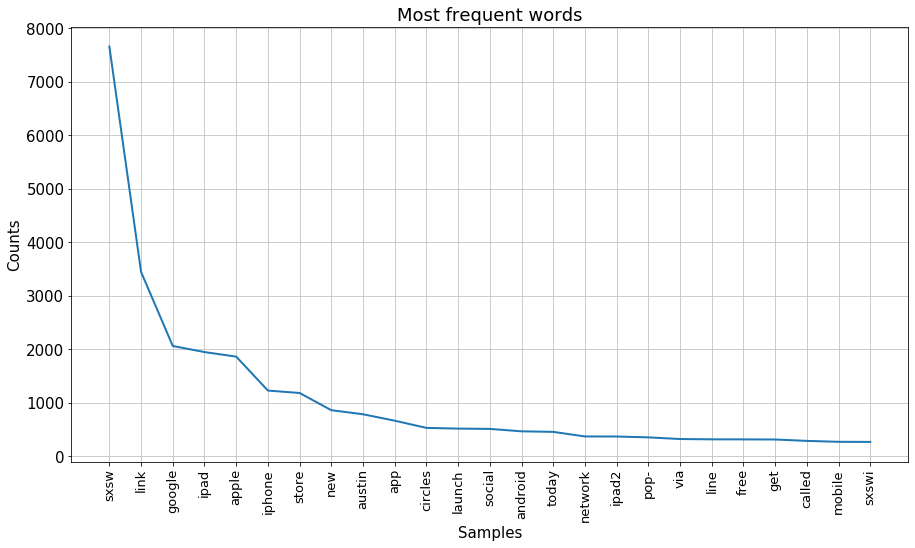

In [38]:
most_frequent_words(data, 'tweet', 'Most frequent words')

In [40]:
negative_clean = data[data['sentiment'] == 0]
neutral_clean = data[data['sentiment'] == 1]
positive_clean = data[data['sentiment'] == 2]
unknown_clean = data[data['sentiment'] == 3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

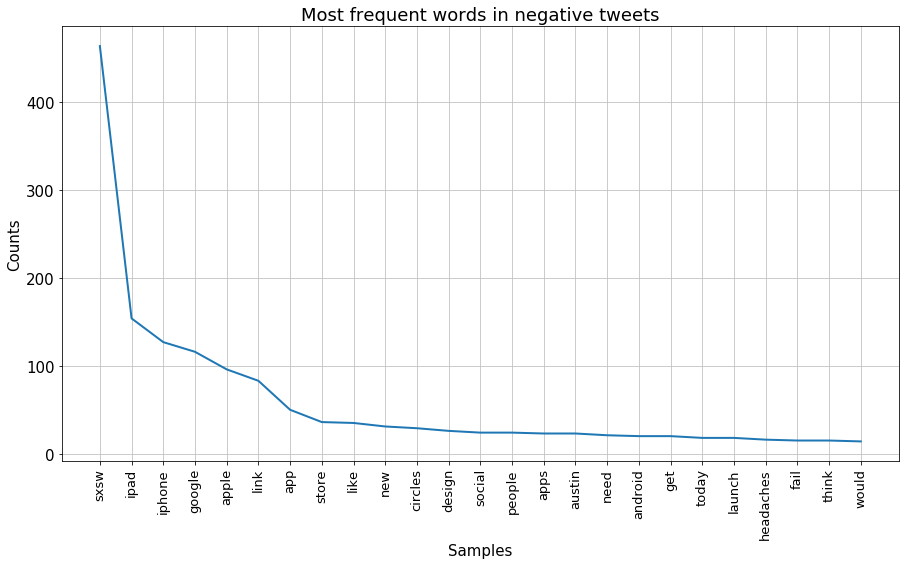

In [41]:
most_frequent_words(negative_clean, 'tweet', 'Most frequent words in negative tweets')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

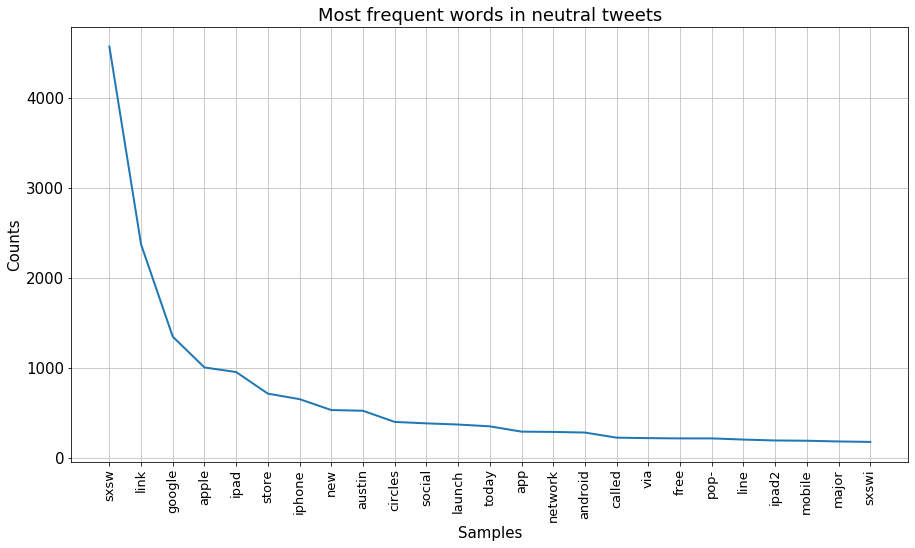

In [42]:
most_frequent_words(neutral_clean, 'tweet', 'Most frequent words in neutral tweets')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

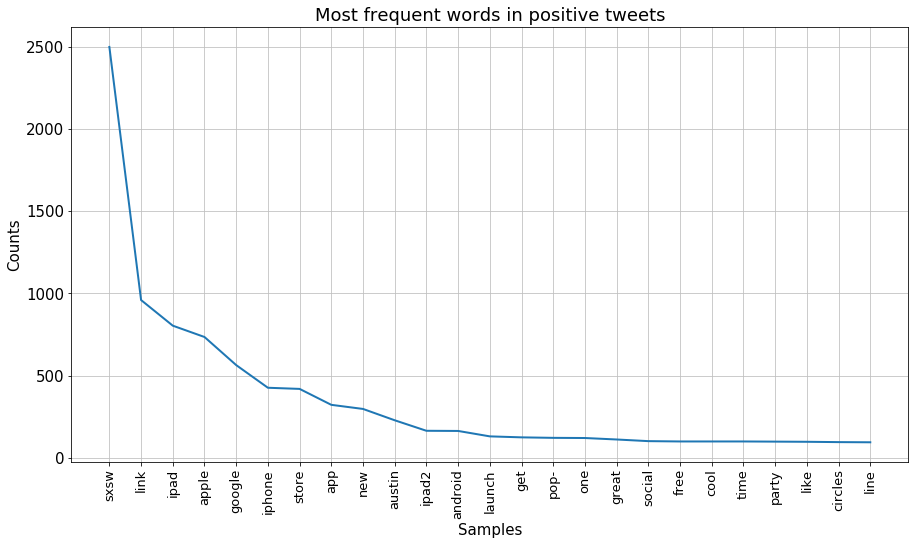

In [43]:
most_frequent_words(positive_clean, 'tweet', 'Most frequent words in positive tweets')

In [47]:
data['has_google'] = data['tweet'].apply(lambda x: "google" in x)

In [51]:
data['has_apple'] = data['tweet'].apply(lambda x: "apple" in x)

In [52]:
data['has_ipad'] = data['tweet'].apply(lambda x: "ipad" in x)

In [53]:
data['has_iphone'] = data['tweet'].apply(lambda x: "iphone" in x)

In [74]:
data['has_android'] = data['tweet'].apply(lambda x: "android" in x)

In [75]:
data['has_android'].value_counts()

False    6807
True      465
Name: has_android, dtype: int64

In [58]:
data.shape

(7272, 7)

In [61]:
data['has_iphone'].value_counts()

False    6008
True     1264
Name: has_iphone, dtype: int64

In [54]:
data.head()

,tweet_id,tweet,sentiment,has_google,has_apple,has_ipad,has_iphone
0,1701,sxswnui sxsw apple defining language touch dif...,1,False,True,False,False
1,1851,learning google doodles doodles light funny in...,1,True,False,False,False
2,2689,one -your-face stealing show years sxsw apple ...,2,False,True,False,False
3,4525,iphone sxsw app would pretty awesome crash eve...,0,False,False,False,True
4,3604,line outside apple store austin waiting new ip...,1,False,True,True,False


In [55]:
has_google = data[data['has_google'] == True]
has_apple = data[data['has_apple'] == True]
has_ipad = data[data['has_ipad'] == True]
has_iphone = data[data['has_iphone'] == True]

In [76]:
has_ios = data[data['has_ios'] == True]
has_android = data[data['has_android'] == True]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

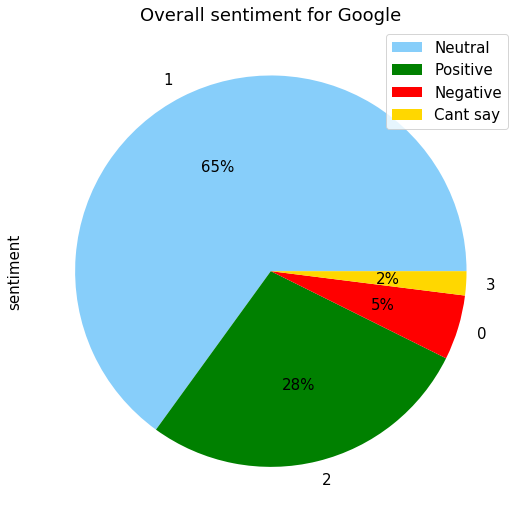

In [65]:
plt.figure(figsize=(15, 9))
labels = ['Neutral', 'Positive', 'Negative', 'Cant say']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.title('Overall sentiment for Google')
no_of_tweets=has_google['sentiment'].value_counts()
no_of_tweets.plot(kind='pie',colors = ['lightskyblue', 'green', 'red', 'gold'], autopct='%1.0f%%')
plt.legend(labels, loc="best")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

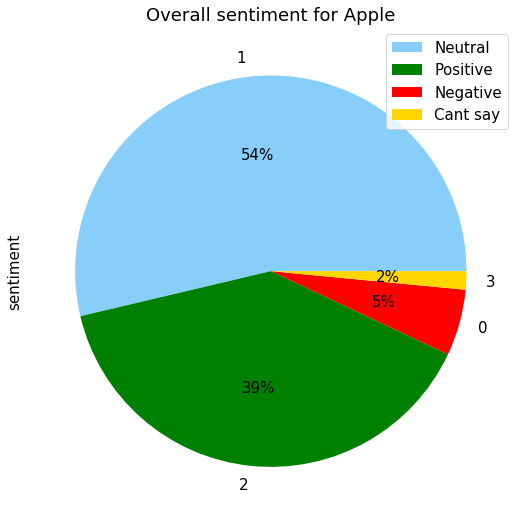

In [66]:
plt.figure(figsize=(15, 9))
labels = ['Neutral', 'Positive', 'Negative', 'Cant say']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.title('Overall sentiment for Apple')
no_of_tweets=has_apple['sentiment'].value_counts()
no_of_tweets.plot(kind='pie',colors = ['lightskyblue', 'green', 'red', 'gold'], autopct='%1.0f%%')
plt.legend(labels, loc="best")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

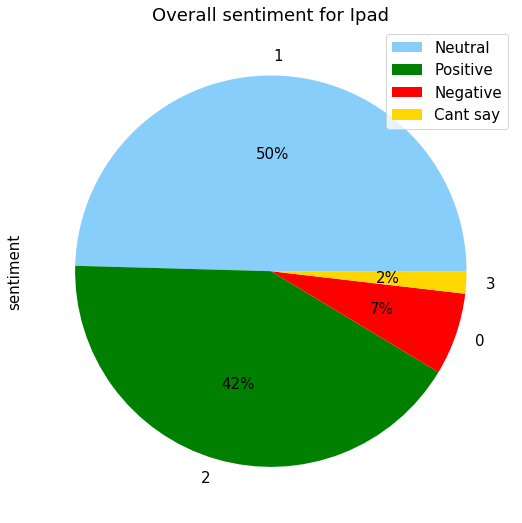

In [67]:
plt.figure(figsize=(15, 9))
labels = ['Neutral', 'Positive', 'Negative', 'Cant say']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.title('Overall sentiment for Ipad')
no_of_tweets=has_ipad['sentiment'].value_counts()
no_of_tweets.plot(kind='pie',colors = ['lightskyblue', 'green', 'red', 'gold'], autopct='%1.0f%%')
plt.legend(labels, loc="best")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

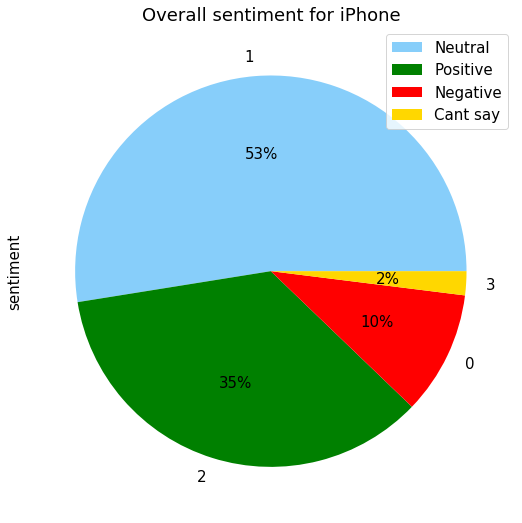

In [68]:
plt.figure(figsize=(15, 9))
labels = ['Neutral', 'Positive', 'Negative', 'Cant say']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.title('Overall sentiment for iPhone')
no_of_tweets=has_iphone['sentiment'].value_counts()
no_of_tweets.plot(kind='pie',colors = ['lightskyblue', 'green', 'red', 'gold'], autopct='%1.0f%%')
plt.legend(labels, loc="best")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

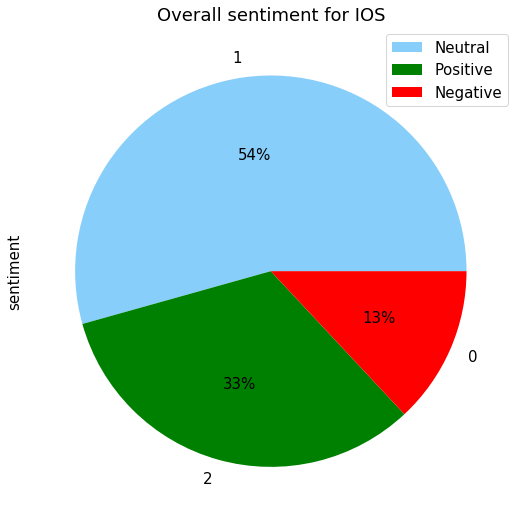

In [77]:
plt.figure(figsize=(15, 9))
labels = ['Neutral', 'Positive', 'Negative', 'Cant say']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.title('Overall sentiment for IOS')
no_of_tweets=has_ios['sentiment'].value_counts()
no_of_tweets.plot(kind='pie',colors = ['lightskyblue', 'green', 'red', 'gold'], autopct='%1.0f%%')
plt.legend(labels, loc="best")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

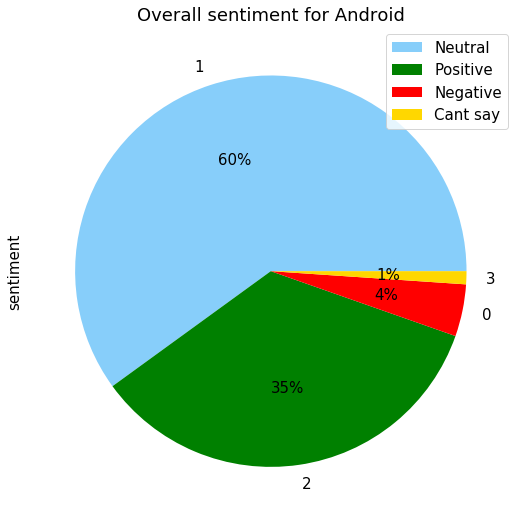

In [78]:
plt.figure(figsize=(15, 9))
labels = ['Neutral', 'Positive', 'Negative', 'Cant say']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.title('Overall sentiment for Android')
no_of_tweets=has_android['sentiment'].value_counts()
no_of_tweets.plot(kind='pie',colors = ['lightskyblue', 'green', 'red', 'gold'], autopct='%1.0f%%')
plt.legend(labels, loc="best")